This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [2]:
import scipy.io as sio

In [117]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/THDDCGCaMP62/100404series/100405seriesint252Smith0_4_60ICTSROIThresh3.mat


In [118]:
Ua=sio.loadmat(filename)
Ua

{'TS': array([[ -1.09592862e-03,  -1.64632858e-04,  -3.31881324e-04, ...,
           4.21103580e-01,   7.89417045e-03,  -6.31801609e-03],
        [ -1.47219165e-03,   1.91960770e-04,  -1.64789104e-05, ...,
           5.71964126e-01,   5.56198548e-03,  -5.21745120e-03],
        [ -1.82270430e-03,   5.80156630e-04,   2.93981538e-04, ...,
           7.02895718e-01,   3.20776099e-03,  -4.07676717e-03],
        ..., 
        [ -2.90323306e-03,   1.87250440e-03,   1.04961179e-03, ...,
           9.53555293e-02,   3.18039463e-03,   1.99446119e-03],
        [ -2.39157758e-03,   2.02257552e-03,   6.91589238e-04, ...,
           5.33441034e-02,   2.49075746e-03,   1.19700152e-03],
        [ -1.73962540e-03,   1.47121456e-03,   5.03059656e-04, ...,
           3.88023198e-02,   1.81176851e-03,   8.70694778e-04]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Aug 22 01:59:46 2018',
 '__version__': '1.0'}

In [119]:
DT=Ua['TS']

In [120]:
DT.shape

(24112, 252)

In [121]:
S1=DT.shape

In [122]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [123]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [124]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [125]:
DTvar.shape

(24112, 252)

open maps

In [126]:
import nibabel as nb

In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/test7/THDDCGCaMP62/100404series/100405seriesint252Smith0_4_60IC.nii


In [14]:
img1 = nb.load(filename2)

In [15]:
data = img1.get_data()

In [16]:
S=data.shape

In [17]:
S

(88, 56, 37, 252)

# Zscore maps

In [127]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [128]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [129]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [130]:
datao=data
Dmapso=Dmaps

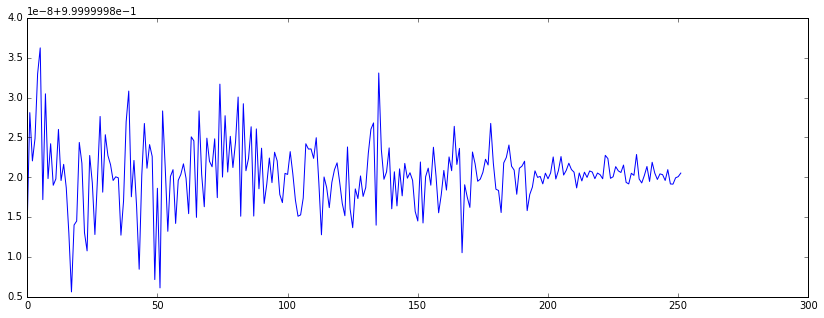

In [131]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [132]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [133]:
Dtemp=data[:,:,:,0]

In [134]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [135]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

In [136]:
DTvar.shape

(24112, 252)

In [137]:
S

(88, 56, 37, 252)

In [29]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/THDDCGCaMP62/100404series/100404seriesXk.mat


In [30]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']
#Xk[1,:]=Ua['Walk']

In [54]:
Xk.shape

(6, 24112)

In [138]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape


if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    Dmean=np.zeros([S[0],S[1],Nstack])
    #Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean

/media/test7/THDDCGCaMP62/100404series/MAX_100405seriesint252Smith0_4_60IC.nii


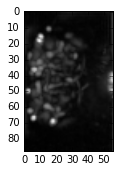

In [139]:
plt.imshow(Vmean,cmap=plt.cm.gray)

In [33]:
Xk=Xk.T

In [34]:
Xk.shape

(6, 24112)

In [144]:
Label_ICs=[]

In [104]:
Xksmoothed=np.zeros(Xk.shape)

for i in range(Xk.shape[1]):
    Xksmoothed[:,i]=np.mean(Xk[:,max(0,i-999):min(Xk.shape[1],i+1000)],1)


Xkdff=Xk[range(3,6),:]-Xksmoothed[range(3,6),:]

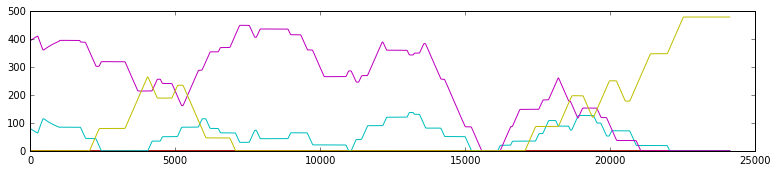

In [141]:
plt.plot(Xksmoothed.T)
plt.show()

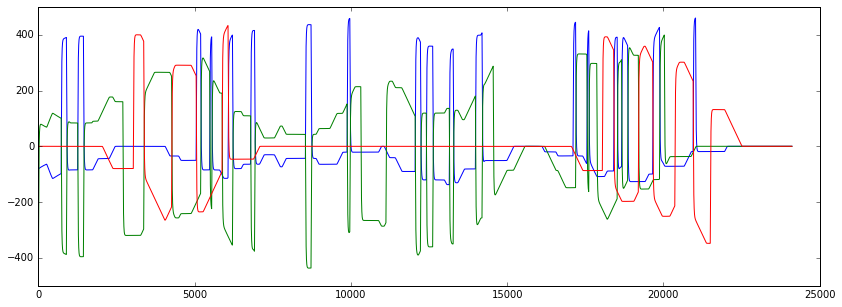

In [107]:
plt.plot(Xkdff.T)

In [142]:
TimeCCMax=np.zeros(S[3])

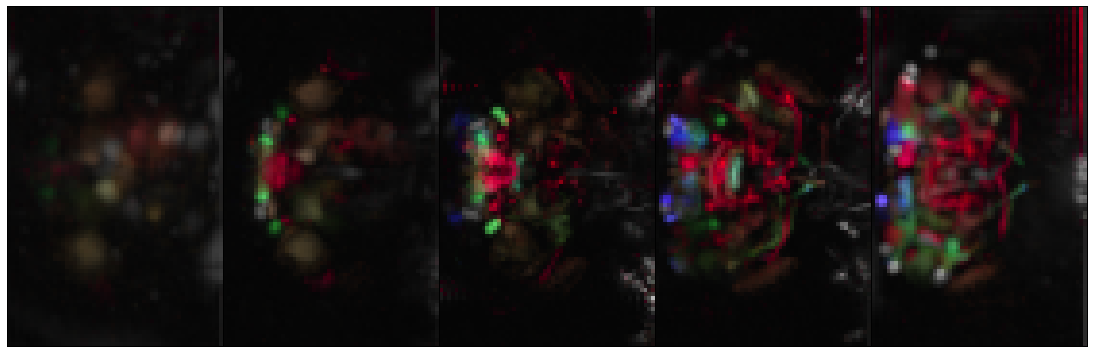

In [149]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

C=np.zeros((S[3],3))
i=1
l=0



for j in range(S[3]):  
    if Label_ICs[j]=='a' and TimeCCMax[j]>0 and TimeCCMax[j]<0.3:
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=10*TimeCCMax[j]
        C[j,1]=1-10*TimeCCMax[j]

        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.2*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas2[1,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        #print(j+1)
        #print(C[j,:])
        #if l==2:
         #   break

for j in range(S[3]):  

    if Label_ICs[j]=='a' and TimeCCMax[j]<0 and TimeCCMax[j]>-0.3:
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        #print(j+1)
        C[j,2]=-6*TimeCCMax[j]
        C[j,1]=1+6*TimeCCMax[j]
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.5*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        #print(j+1)
        #print(C[j,:])
        #if l==2:
            #break
    

C=np.zeros((S[3],3))
i=1
l=0            
            
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/90
    #Df=Df/(np.max(np.max(np.max(Df),3)))
Df[Df>1]=1
Df[Df<0]=0
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

In [59]:

#zip(range(S[3]),Label_ICs)

In [ ]:
CCry=np.correlate(DT[:,5],DT[:,11],'full')

In [60]:
set(Label_ICs)

{'', 'gamma'}

In [ ]:
Label_ICs[94]='M'

In [ ]:
Label_ICs[104]='alpha'
Label_ICs[100]='alpha'

Label_ICs[138]='betap'
Label_ICs[94]='betap'
Label_ICs[90]='betap'

Label_ICs[67]='gamma'
Label_ICs[60]='gamma'
Label_ICs[24]='gamma'
Label_ICs[54]='gamma'
Label_ICs[33]='gamma'


In [85]:
Xk.shape

(6, 24112)

In [66]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((3,S[3]))

In [67]:
from sklearn import linear_model

In [68]:
algorithm = linear_model.LinearRegression()

In [70]:
for j in range(S[3]):
    model = algorithm.fit(Xkdff.T, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(Xkdff.T,DT[:,j])

In [71]:
Xkdff.shape

(3, 24112)

In [ ]:
Label_ICsb=Label_ICs[i for i in range(4,256)]

In [ ]:
len(Label_ICsb)

0
[ 0.24050196]
[-0.00134413 -0.0001851  -0.00020095]
1
[ 0.23688925]
[-0.00110808 -0.00016594 -0.00014076]
2
[ 0.0712372]
[ 0.00037858  0.00018124 -0.00014833]
3
[ 0.6025803]
[  1.37845223e-03  -5.85304419e-05  -1.62080197e-06]
4
[ 0.05217743]
[ 0.00015944  0.00011572 -0.00015389]
5
[ 0.00756376]
[ -5.13139889e-05  -9.92667189e-05  -2.42583517e-05]
6
[ 0.17578532]
[ -6.67084795e-04  -6.42001534e-05   4.21608660e-05]
7
[ 0.01413542]
[ -5.15203839e-05  -1.01271513e-04   1.68865129e-05]
8
[ 0.56296086]
[  9.81995900e-04  -8.27653826e-05   5.36521761e-06]
9
[ 0.59730938]
[  1.01803442e-03  -5.97473818e-05  -1.03317896e-05]
10
[ 0.58698783]
[  9.98755666e-04  -6.70635444e-05  -1.22032994e-05]
11
[ 0.57785364]
[  9.58398162e-04  -1.12679163e-04   4.91216498e-06]
12
[ 0.01128904]
[ -1.49170491e-04  -6.47260519e-05  -1.86521217e-05]
13
[ 0.52257675]
[  8.88278743e-04  -6.41034215e-05   7.85078481e-06]
14
[ 0.39898077]
[  6.81448054e-04  -1.38261930e-04   1.30560621e-05]
15
[ 0.44145239]
[  7.

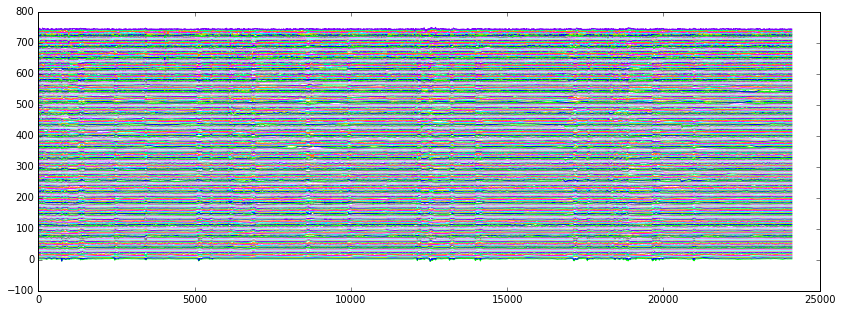

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:95: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:96: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:97: RuntimeWarning: invalid value encountered in divide


19
[ 0.4056167]
[  6.48343138e-04  -7.03993953e-05   4.06749718e-05]
25
[ 0.05029531]
[ -2.33550676e-04  -2.00730292e-05   1.94575456e-06]
40
[ 0.31756874]
[  3.99173222e-04  -8.13175682e-05   2.95372776e-05]
89
[ 0.13627593]
[  1.54548266e-04  -5.09394864e-05   1.71470507e-05]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 1

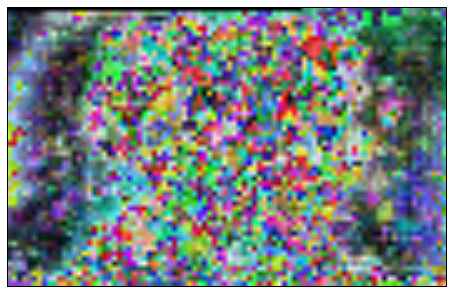

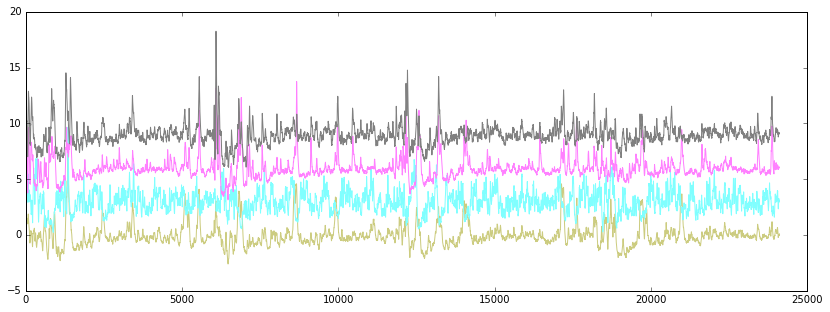

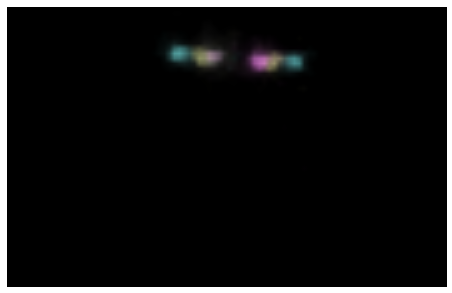

In [72]:
List1=[(Label_ICs[i],i) for i in range(S[3])]
Newlist=sorted(List1, key=lambda List1: List1[0])

Neworder=[Newlist[i][1] for i in range(S[3])]

NewDT=DTvar[:,Neworder[:]].T

for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

C1=np.zeros([16,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
C1[6][:]=(1,0.5,0)
C1[7][:]=(0,1,0.5)
C1[8][:]=(0.5,0,1)
C1[9][:]=(0.8,0.8,0.5)
C1[10][:]=(0.5,1,1)
C1[11][:]=(1,0.5,1)
C1[12]=(0.5,0.5,0.5)
C1[13]=(0.2,0.5,0.5)
C1[14]=(0.5,0.2,0.5)
C1[15]=(0.5,0.5,0.2)
h=3

Newmaps=Dmaps[:,:,:,Neworder[:]]

L=len(set([Label_ICs[Neworder[i]] for i in range(len(Neworder))]))

Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

Regionname=[]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

j=0
i=0
k=Label_ICs[Neworder[0]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.6*np.max(DMapsordered[:,:,:,i],2)*C1[i%12+1][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%15+1][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

pylab.rcParams['figure.figsize'] = (14, 5)
import scipy
from scipy import ndimage
j=0
m=0
L=0
k=Label_ICs[Neworder[0]]
for i in range(len(Neworder)):
    m=m+1
    
    
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        
        k=k1
        m=0
        
        plt.show()
        plt.figure(2*j+1)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        j=j+1
        plt.figure(2*j)
        plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
        plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
        plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
        #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    plt.plot(NewDT[i,:]+h*m,color=C1[i%12+1][:])
    print(Neworder[i])
    print(Rsq[:,Neworder[i]])
    print(Betas[:,Neworder[i]])
plt.figure(2*j+1)
Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
IM=plt.imshow(Rotated_Plot)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
print(Neworder)

In [ ]:
plt.plot(Xkdff.T)

4
[ 1.    0.46  0.  ]
9
[ 1.    0.52  0.  ]
10
[ 1.   0.7  0. ]
11
[ 1.   -0.02  0.  ]
12
[ 1.   0.7  0. ]
14
[ 1.   0.4  0. ]
16
[ 1.   0.4  0. ]
18
[ 1.   -0.62  0.  ]
19
[ 1.    0.34  0.  ]
21
[ 1.    0.04  0.  ]
22
[ 1.   -0.68  0.  ]
23
[ 1.   -0.32  0.  ]
24
[ 1.    0.58  0.  ]
31
[ 1.   -0.08  0.  ]
32
[ 1.   -0.32  0.  ]
33
[ 1.    0.58  0.  ]
37
[ 1.    0.88  0.  ]
39
[ 1.    0.82  0.  ]
41
[ 1.    0.64  0.  ]
49
[ 1.    0.34  0.  ]
50
[ 1.    0.34  0.  ]
54
[ 1.    0.58  0.  ]
57
[ 1.   0.1  0. ]
58
[ 1.    0.22  0.  ]
59
[ 1.    0.64  0.  ]
60
[ 1.   -0.02  0.  ]
66
[ 1.   -0.14  0.  ]
75
[ 1.    0.58  0.  ]
76
[ 1.    0.82  0.  ]
77
[ 1.    0.16  0.  ]
81
[ 1.    0.94  0.  ]
88
[ 1.   0.7  0. ]
90
[ 1.   0.7  0. ]
91
[ 1.    0.64  0.  ]
97
[ 1.    0.34  0.  ]
102
[ 1.    0.58  0.  ]
105
[ 1.   0.7  0. ]
106
[ 1.    0.58  0.  ]
108
[ 1.    0.94  0.  ]
114
[ 1.    0.46  0.  ]
120
[ 1.    0.64  0.  ]
122
[ 1.    0.64  0.  ]
126
[ 1.    0.52  0.  ]
128
[ 1.    0.58  0.  ]
129
[

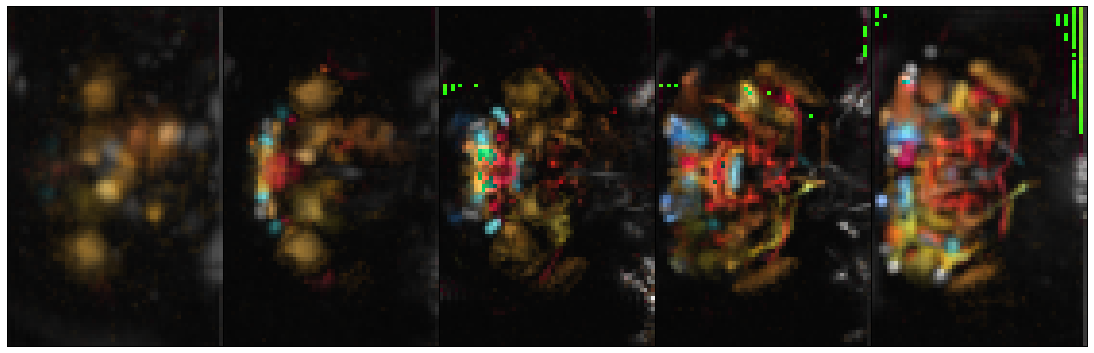

In [148]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

C=np.zeros((S[3],3))
i=1
l=0



for j in range(S[3]):  
    if Label_ICs[j]=='a' and TimeCCMax[j]>0 and TimeCCMax[j]<0.3:
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,0]=1
        C[j,1]=1-6*TimeCCMax[j]

        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.4*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas2[1,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        print(j+1)
        print(C[j,:])
        #if l==2:
         #   break

for j in range(S[3]):  

    if Label_ICs[j]=='a' and TimeCCMax[j]<0 and TimeCCMax[j]>-0.3:
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        #print(j+1)
        C[j,2]=1
        C[j,1]=1+3*TimeCCMax[j]
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.4*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #Betas[0,j]=0
        #print(Indexo[j])
        i=i+1
        l=l+1
        print(j+1)
        print(C[j,:])
        #if l==2:
            #break
    

C=np.zeros((S[3],3))
i=1
l=0            
            
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/70
    #Df=Df/(np.max(np.max(np.max(Df),3)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)